# Main Script for the third challenge
Note: This script is a combination of the two main scripts used for the final result. The first section was taken from the script "*cleaning.ipynb*" and the final model was taken from "*XGBoost_Final.ipynb*"

---
# Cleaning

# IMPORT LIBRARIES

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [163]:
# read the train_cleaneds
train_source = pd.read_csv('./Reto 3/data/training_set.csv')
test_source = pd.read_csv('./Reto 3/data/testing_set.csv')

In [164]:
# see the size of the train_cleaneds
train_source.shape, test_source.shape

((3509, 8), (1500, 7))

In [165]:
train_source.head()

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1


In [166]:
test_source.head()

,test_idx,Time,Open,High,Low,Close,Volume
0,0,2018-05-29 00:00:00,1.16271,1.16394,1.15099,1.15343,336090
1,1,2018-05-30 00:00:00,1.15342,1.16759,1.15186,1.16627,318421
2,2,2018-05-31 00:00:00,1.16627,1.17243,1.16410,1.16938,285788
3,3,2018-06-01 00:00:00,1.16937,1.17178,1.16170,1.16584,253533
4,4,2018-06-03 00:00:00,1.16561,1.16794,1.16561,1.16757,14803


In [167]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]
    volume = row[6]
    # check if all conditions are true
    if low <= high and low <= open and low <= close and high >= open and high >= close and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid

In [168]:
# create column 'valid' to indicate if the row is valid
train_source['valid'] = train_source.apply(is_valid, axis=1)

In [169]:
# plot non valid data with pyplot
import plotly.express as px
import plotly.graph_objects as go

In [170]:
invalid_data = train_source[(train_source['valid'] == False)]

fig = go.Figure(data=[go.Candlestick(x=invalid_data['Time'],
                open=invalid_data['Open'],
                high=invalid_data['High'],
                low=invalid_data['Low'],
                close=invalid_data['Close'])])

fig.show()

In [171]:
train_source.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,3491.000000,3453.000000,3442.000000,3470.000000,3.481000e+03,3509.000000
mean,1754.000000,1.315917,1.308379,1.298522,1.309465,2.793843e+05,0.499858
std,1013.105375,0.463695,0.361848,0.367142,0.406838,2.995125e+05,0.500071
min,0.000000,0.136331,0.133119,0.133926,0.132743,4.970000e+02,0.000000
25%,877.000000,1.181970,1.184600,1.176797,1.181277,8.122800e+04,0.000000
50%,1754.000000,1.313140,1.318720,1.307255,1.313005,1.912090e+05,0.000000
75%,2631.000000,1.376900,1.381560,1.372110,1.376593,2.699740e+05,1.000000
max,3508.000000,12.604500,11.522790,10.871280,10.877040,2.693602e+06,1.000000


In [172]:
test_source.describe()

,test_idx,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,749.500000,1.125877,1.129278,1.122566,1.125837,2.374014e+05
std,433.157015,0.056683,0.056129,0.057152,0.056673,2.305794e+05
min,0.000000,0.956940,0.967070,0.953570,0.956880,2.343000e+03
25%,374.750000,1.095598,1.099522,1.092465,1.095330,8.010825e+04
50%,749.500000,1.130070,1.133030,1.126825,1.129860,1.947670e+05
75%,1124.250000,1.169507,1.173942,1.166930,1.169610,3.249358e+05
max,1499.000000,1.233240,1.234940,1.226550,1.233240,2.997191e+06


In [173]:
# see the dates maximim and minimum of the train and test train_cleaneds
print("Train: ", train_source["Time"].min(), train_source["Time"].max()) 
print("Test: ", test_source["Time"].min(), test_source["Time"].max()) 

Train:  2007-03-07 00:00:00 2018-05-23 00:00:00
Test:  2018-05-29 00:00:00 2023-03-14 00:00:00


# DUPLICATES

In [174]:
# looking for duplicates
train_source.duplicated().sum()

0

In [175]:
test_source.duplicated().sum()

0

# OUTLIERS

In [176]:
# miramos si los datos tiene valores atípicos con gráficos
train_source  

,train_idx,Time,Open,High,Low,Close,Volume,label,valid
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0,True
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1,True
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1,True
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1,True
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1,False
...,...,...,...,...,...,...,...,...,...
3504,3504,2018-05-18 00:00:00,1.18053,1.18221,1.17498,1.17689,220609.0,1,True
3505,3505,2018-05-20 00:00:00,1.17684,1.17756,1.17441,1.17474,18855.0,0,True
3506,3506,2018-05-21 00:00:00,1.17473,1.17973,1.17165,1.17913,227861.0,0,True
3507,3507,2018-05-22 00:00:00,1.17914,1.18296,1.17567,1.17824,255729.0,0,True


In [177]:
train_source.dtypes

train_idx      int64
Time          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
label          int64
valid           bool
dtype: object

In [178]:
# Set the type of the column "Time" to datetime
train_cleaned = train_source.copy()
train_cleaned['Time'] = pd.to_datetime(train_cleaned['Time'])

We'll start looking at our data using plotly charts. Since we are working with time series with open, high, low, close and volume values, we will use candlestick charts.

In [179]:
import plotly.express as px
import plotly.graph_objects as go

In [180]:
fig = go.Figure(data=[go.Candlestick(x=train_cleaned['Time'],
                open=train_cleaned['Open'],
                high=train_cleaned['High'],
                low=train_cleaned['Low'],
                close=train_cleaned['Close'])])

fig.show()

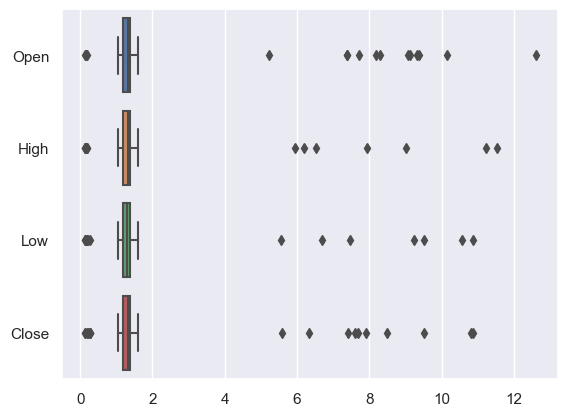

In [181]:
# horizontal boxplot of open, high, low and close prices
sns.set_theme(style="darkgrid")
sns.boxplot(data=train_cleaned[["Open", "High", "Low", "Close"]], orient="h");

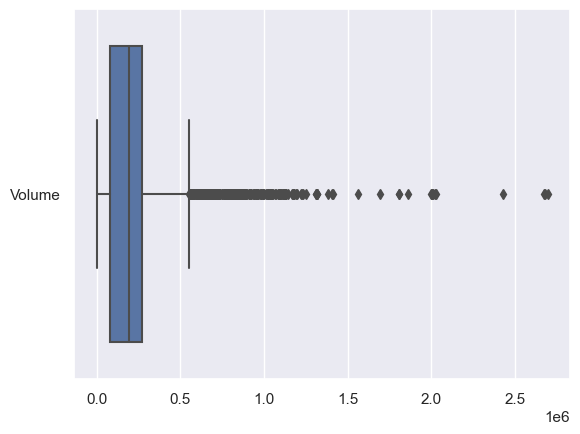

In [182]:
# horizontal boxplot of volume
sns.set_theme(style="darkgrid")
sns.boxplot(data=train_cleaned[["Volume"]], orient="h");

We can observe extreme values in the data, which are outliers. We will try different methods to deal with them.<br>
We also have 'impossible' values such as close values lower than the open value, or high values lower than the low value (Jul 10 2014).<br>
We will try to deal with them too.

In [183]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]
    volume = row[6]
    # check if low is the lowest value and high is the highest value
    if low == min(open, high, low, close) and high == max(open, high, low, close) and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid

In [184]:
train_invalid_values = (train_cleaned.apply(is_valid, axis=1)).value_counts()
test_invalid_values = (test_source.apply(is_valid, axis=1)).value_counts()

print("Valid = True\nInvalid = False\n")
print("Train: \n", train_invalid_values)
print("\nTest: \n", test_invalid_values)

Valid = True
Invalid = False

Train: 
 True     3295
False     214
Name: count, dtype: int64

Test: 
 True    1500
Name: count, dtype: int64


## IQR method
First, we'll use the IQR method to detect the outliers. The IQR method is a technique used to detect outliers that uses the interquartile range (IQR) to determine outliers based on a lower bound (first quartile - 1.5 * IQR) and an upper bound (third quartile + 1.5 * IQR). Any data points outside of these bounds are considered outliers and are removed from the dataset.

In [185]:
import pandas as pd
import numpy as np

def delete_outlier_treatment_iqr(dataframe, columns, multiplier=1.5):
    for column in columns:
        column_data = dataframe[column]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        dataframe = dataframe[~dataframe[column].isin(outliers)]
    return dataframe

### Deleting the outliers

In [186]:
train_deleted_outliers = delete_outlier_treatment_iqr(train_cleaned, ["Open", "High", "Low", "Close", "Volume"], 1.5)

In [187]:
train_cleaned.shape[0]-train_deleted_outliers.shape[0]

659

In [188]:
(train_cleaned.shape[0]-train_deleted_outliers.shape[0])/train_cleaned.shape[0]*100

18.780279281846678

In [189]:
fig_iqr = go.Figure(data=[go.Candlestick(x=train_deleted_outliers['Time'],
                open=train_deleted_outliers['Open'],
                high=train_deleted_outliers['High'],
                low=train_deleted_outliers['Low'],
                close=train_deleted_outliers['Close'])])

# save the plot as a png
#fig_iqr.write_image("images/plots/candlestick_iqr.png")

fig_iqr.show()

### Other alternatives to deleting outliers
Outliers are those that deviate a lot from the rest of the data and can affect the statistical analysis. There are several ways to deal with outliers, depending on the cause and the goal of your study. Some options are:

- Verify that the outlier is not a data entry error and correct it if necessary.
- Delete the outlier if it is not relevant or represents an anomaly that you are not interested in.
- Assign a new value to the outlier, for example, the mean or median of the data.
- Use statistical methods, based on distance, density or clustering to detect and treat outliers.
- Use the Z-Score method to identify and remove values that deviate more than a certain number of standard deviations from the mean.

We will continue with the IQR method. Like we have seen there is 660 rows that have been removed but we do not want that because we have a temporal data. Because of that we will replace them with nan values to treat them in the future.

### Replacing the outliers with nan values

In [190]:
import pandas as pd
import numpy as np

def null_outlier_treatment_iqr(dataframe, columns, multiplier=1.5):
    for column in columns:
        column_data = dataframe[column]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        dataframe.loc[outliers.index, column] = np.nan
    return dataframe

In [191]:
train_null = train_cleaned.isna().sum()
train_null_outliers = null_outlier_treatment_iqr(train_cleaned, ['Open', 'High', 'Low', 'Close'], 1.5)
train_iqr_null = train_null_outliers.isna().sum()

In [192]:
train_null

train_idx     0
Time          0
Open         18
High         56
Low          67
Close        39
Volume       28
label         0
valid         0
dtype: int64

In [193]:
train_iqr_null

train_idx     0
Time          0
Open         36
High         74
Low          84
Close        57
Volume       28
label         0
valid         0
dtype: int64

In [194]:
train_null - train_iqr_null

train_idx     0
Time          0
Open        -18
High        -18
Low         -17
Close       -18
Volume        0
label         0
valid         0
dtype: int64

# MISSING DATES

In [195]:
train_source.Time.min(), train_source.Time.max()

('2007-03-07 00:00:00', '2018-05-23 00:00:00')

In [196]:
# calcular las fechas que faltan
idx = pd.date_range(start=train_source.Time.min(), end=train_source.Time.max(), freq='D')

# crear un dataframe con los valores faltantes
y = pd.DataFrame(train_null_outliers.set_index('Time'), index=idx)

In [197]:
train_null_outliers = y

In [198]:
y

,train_idx,Open,High,Low,Close,Volume,label,valid
2007-03-07,0.0,1.31258,1.31844,1.31086,1.31648,1807377.0,0.0,True
2007-03-08,1.0,1.31667,1.31813,1.31154,1.31396,1995920.0,1.0,True
2007-03-09,2.0,1.31396,1.31583,1.30864,1.31118,1859100.0,1.0,True
2007-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-11,3.0,1.31236,1.31415,1.31068,1.31175,192381.0,1.0,True
...,...,...,...,...,...,...,...,...
2018-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-20,3505.0,1.17684,1.17756,1.17441,1.17474,18855.0,0.0,True
2018-05-21,3506.0,1.17473,1.17973,1.17165,1.17913,227861.0,0.0,True
2018-05-22,3507.0,1.17914,1.18296,1.17567,1.17824,255729.0,0.0,True


# NULL VALUES

## For the dataset with the deteled outliers

Like we can see, there are missing values in several variables

In [199]:
train_deleted_outliers.isnull().sum()

train_idx     0
Time          0
Open         16
High         41
Low          53
Close        29
Volume       28
label         0
valid         0
dtype: int64

In [200]:
# calculate the percentage of null values
train_deleted_outliers.isnull().sum() / len(train_deleted_outliers) * 100

train_idx    0.000000
Time         0.000000
Open         0.561404
High         1.438596
Low          1.859649
Close        1.017544
Volume       0.982456
label        0.000000
valid        0.000000
dtype: float64

First we delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume", if there´s any.

In [201]:
# delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume"
train = train_deleted_outliers.dropna(subset=["Open", "High", "Low", "Close", "Volume"], how='all')

In [202]:
# however there are no rows with the previous columns with null values
train_deleted_outliers.shape, train.shape

((2850, 9), (2850, 9))

**Now we must fill the missing values somehow**

Care must be taken with the look forward bias for imputation methods. *Look ahead bias* is a type of bias that occurs when a study or simulation relies on data or information that was not yet available or known during the time period being studied. It generally leads to inaccurate results from a study or simulation.

One of the possible methods is interpolation, that assumes a linear relationship (or not lineal, depends on the relation between the variables) between data points and utilises non-missing values from adjacent data points (past and future) to compute a value for a missing data point. Therefore, we reject this method because of the use of look ahead bias.. For that reason we will look for a way to avoid it.

Bearing the above mentioned in mind and the computational resources that we have, there can be several approaches to deal with the null values:

1. Remove the null values.

2. Fill the null values with the value of the previous day.

3. Fill the null values with the total average or moving average.

4. Fill in the null values by adding the value of the row with the average of the variation of the last 10 days. In other words, if we have a null value on December 11, we would calculate the average of the variations of the previous 10 days. That is, if December 1 has a value of 2, December 2 has a value of 3 and so on until the 10th, we have an average variation of 1 ((1+1+1+1+ 1+1+1+1+1+1)/10). Then we would add this variation to the value of row 11.
This method could be useful due to the samll amount of missing values. However, it assumes that the data are stationary and that the variability of the data remains constant over time. It may not be suitable if the data have a trend or seasonality, as it may introduce biases in the imputation.

5. Bayesian posterior consensus distribution that optimally controls the trade-off between look-ahead bias and variance in the imputation. Combine multiple plausible imputations using Bayesian model averaging. It only uses past information data.
This method is more sophisticated and takes into account the uncertainty and prior knowledge in the data. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using a Bayesian approach. This method does not require future data and therefore, avoids look-ahead bias.

6. Wasserstein Interpolation: interpolate probability distributions. The method seeks to find an intermediate distribution between two given distributions that minimizes the wasserstein distance, which measures the minimum **work** required to transform one distribution into the other.
This method is suitable for continuous data and assumes that the data have a probabilistic structure. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using probability distributions (like the previous one). It neither require future data, avoiding look-ahead bias.

For the ***Open*** and ***Close*** variables, it may make more sense to use method 4, which involves filling in the null values by adding the value of the row with the average of the variation of the last 10 days. This is because these variables are directly related to the start and end of a trading period, and using past information to fill in the missing values can help preserve the temporal structure of the data.


On the other hand, the Bayesian posterior consensus and Wasserstein Interpolation methods are more suited for cases where the missing values are not as temporally dependent, and where incorporating prior knowledge and uncertainty may be more useful. For the ***High***, ***Low***, and ***Volume*** variables, these methods may be more appropriate, as they are not as directly tied to the start and end of a trading period, and incorporating uncertainty and prior knowledge can help fill in the missing values in a more robust and accurate manner.

Like we can see on the scatter plot below between Time and High/Low, we have a narrow range of values (ouliers already taken care of). Therefore the Bayesian method could be a suitable choice for imputing missing values on this columns. This is because the Bayesian method is known for its ability to handle small samples sizes and constrained data ranges, which are characteristics of the data. Additionally the Bayesian method can provide a posterior distribution that reflects the uncertainity in the imputed values, which can be useful for downstream analysis.

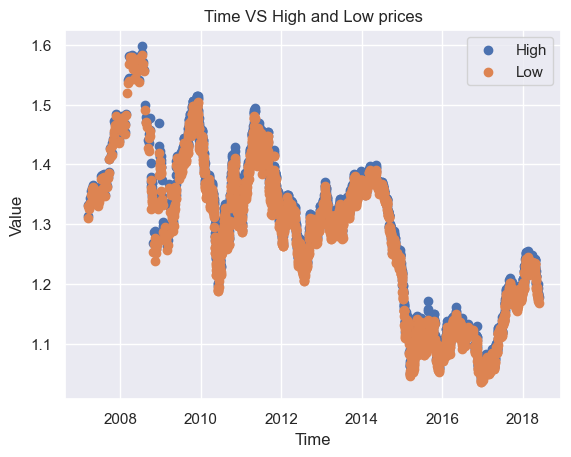

In [203]:
# do a scatter plot between the columns "Time" and "High" 
plt.scatter(train_deleted_outliers["Time"], train_deleted_outliers["High"]), plt.scatter(train_deleted_outliers["Time"], train_deleted_outliers["Low"])
# incorporate the labels and title and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time VS High and Low prices")
plt.legend(["High", "Low"])

Having chosen the third option for the columns ***Open*** and ***Close***, we will iterate over every row in the DataFrame, and for any row with a null value in the column, it will look at the previous 10 days values, ignore any null values, and calculate the average variation. It will then fill in the null value with the previous day's "Open" and "Close" value plus the average variation.

In [204]:
''' 
Function to fill especifically the null values of the columns "Open" and "Close" by calcultaing the average variation of the previous 10 days 
and adding it to the previous day value of the column
'''
def fill_na_with_variation(df, column):
    for i in range(10, len(df)):
        if pd.isna(df.iloc[i, df.columns.get_loc(column)]):  # check if the value is null
            previous = df.iloc[i-10:i-1, df.columns.get_loc(column)]  # get the previous 10 values
            previous_not_null = previous[~previous.isnull()]  # get the previous values that are not null
            if not previous_not_null.empty:  # check if there are previous values that are not null
                avg_variation = (previous_not_null.diff().mean(skipna=True))  # calculate the average variation
                df.iloc[i, df.columns.get_loc(column)] = df.iloc[i-1, df.columns.get_loc(column)] + avg_variation  # fill the null value with the previous value plus the average variation
            else:  # if the previous 10 days have null values
                df.iloc[i, df.columns.get_loc(column)] = df.iloc[i-1, df.columns.get_loc(column)]  # fill the null value with the previous value
    return df

In [205]:
train_final = fill_na_with_variation(train_deleted_outliers, "Open")
train_final = fill_na_with_variation(train_final, "Close")

In [206]:
train_final.isnull().sum()

train_idx     0
Time          0
Open          0
High         41
Low          53
Close         0
Volume       28
label         0
valid         0
dtype: int64

As we mentioned above for the ***High*** and ***Low*** columns we will use the Bayesian method.

That method does not have look-ahead bias. The IterativeImputer class in scikit-learn, when used with an appropriate estimator (in this case, BayesianRidge), iteratively fills missing values based on the observed values in the dataset. It does not rely on future or lookahead information.

The IterativeImputer works by modeling each feature with missing values as a function of other features in the dataset. It iteratively estimates the missing values based on the observed values in the same feature and other features. This iterative process helps to capture the relationships and patterns present in the data without using lookahead information.

Therefore, using IterativeImputer with BayesianRidge in the provided code is a suitable approach to fill missing values without introducing look-ahead bia

In [207]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer  # Import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the columns to fill null values in
cols_to_impute = ['High', 'Low', "Volume"]

# Create a Bayesian Ridge model and an IterativeImputer instance
model = BayesianRidge()
imputer = IterativeImputer(estimator=model)

# Fit the imputer on the training data
imputer.fit(train_final[cols_to_impute])

# Transform the training data to fill null values
train_final[cols_to_impute] = imputer.transform(train_final[cols_to_impute])

In [208]:
train_final.isnull().sum()

train_idx    0
Time         0
Open         0
High         0
Low          0
Close        0
Volume       0
label        0
valid        0
dtype: int64

The **test**  does not have null values

In [209]:
test_source.isnull().sum()

test_idx    0
Time        0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [210]:
fig_iqr = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

# save the plot as a png
#fig_iqr.write_image("images/plots/candlestick_iqr.png")

fig_iqr.show()

In [211]:
# save the dataframe as a csv file
#train_final.to_csv("data/train_cleaned.csv", index=False)

## For the dataset with the outliers replaced with nan values
For the dataset with the outliers replaced with nan values, we will use the same methods as for the dataset with the deleted outliers and compare the results.

We can see that initially we have more null values with this method. This is the expected result, since we have replaced the outliers with nan values. However, we will see that the results are better than the ones obtained with the dataset with the deleted outliers.

In [212]:
train_null_outliers.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,3473.000000,3435.000000,3425.000000,3452.000000,3.481000e+03,3509.000000
mean,1754.000000,1.292558,1.297740,1.286950,1.291979,2.793843e+05,0.499858
std,1013.105375,0.130645,0.131287,0.129948,0.130561,2.995125e+05,0.500071
min,0.000000,1.039040,1.041780,1.035230,1.039050,4.970000e+02,0.000000
25%,877.000000,1.182080,1.185500,1.177380,1.181425,8.122800e+04,0.000000
50%,1754.000000,1.312900,1.318900,1.307330,1.312945,1.912090e+05,0.000000
75%,2631.000000,1.376530,1.381375,1.371770,1.376362,2.699740e+05,1.000000
max,3508.000000,1.597490,1.603890,1.586430,1.597490,2.693602e+06,1.000000


In [213]:
# For open and close values
train_final_v2 = fill_na_with_variation(train_null_outliers, "Open")
train_final_v2 = fill_na_with_variation(train_final_v2, "Close")

In [214]:
train_final_v2.isnull().sum()

train_idx    587
Open           1
High         661
Low          671
Close          2
Volume       615
label        587
valid        587
dtype: int64

In [215]:
# For high, low and volume values
# Select the columns to fill null values in
cols_to_impute = ['High', 'Low', "Volume"]

# Create a Bayesian Ridge model and an IterativeImputer instance
model = BayesianRidge()
imputer = IterativeImputer(estimator=model)

# Fit the imputer on the training data
imputer.fit(train_final_v2[cols_to_impute])

# Transform the training data to fill null values
train_final_v2[cols_to_impute] = imputer.transform(train_final_v2[cols_to_impute])

In [216]:
train_final_v2.isnull().sum()

train_idx    587
Open           1
High           0
Low            0
Close          2
Volume         0
label        587
valid        587
dtype: int64

# Non Valid values

## For the dataset with the deteled outliers

In [217]:
train_final[train_final['valid'] == False]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid
25,25,2007-04-05,1.33720,1.344100,1.335250,1.342250,157383.501706,0,False
70,70,2007-05-28,1.34484,1.345790,1.344070,1.344450,157383.501696,1,False
201,201,2007-10-28,1.44146,1.442210,1.439880,1.440620,157383.501526,1,False
210,210,2007-11-07,1.45527,1.472940,1.454950,1.464780,157383.501486,0,False
309,309,2008-03-02,1.51928,1.527444,1.518540,1.521250,34501.000000,1,False
...,...,...,...,...,...,...,...,...,...
3417,3417,2018-02-06,1.23831,1.247096,1.231380,1.238650,407513.000000,0,False
3432,3432,2018-02-23,1.23267,1.232910,1.227980,1.232526,214189.000000,0,False
3434,3434,2018-02-26,1.22896,1.235500,1.227760,1.233150,157383.501897,0,False
3478,3478,2018-04-18,1.23700,1.239710,1.234180,1.238681,234408.000000,0,False


In [218]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

for invalid in train_final[train_final['valid'] == False]['Time']:
    fig.add_shape(type="line",
    x0=invalid,
    y0=1,
    x1=invalid,
    y1=1.65,
    line=dict(color="orange",width=1),
    opacity=0.5)

# add kde with the volume
#fig.add_trace(go.Scatter(x=train_final['Time'], y=train_final['Volume'], name='Volume', yaxis="y2", line=dict(color='blue', width=1)))

fig.show()

Although we have filled the null values, we still have non valid values. For example, we have a close value lower than the open value, or high values lower than the low value (Apr 05 2007). We will try to deal with them too.

In a first approach, we will replace the variable that makes a row "not valid" with the corresponding value of that row. For example, for the variables low and high, we will replace the value of the low variable with the lowest/highest value of that row.

In [219]:
def makeValid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[2]
    high = row[3]
    low = row[4]
    close = row[5]

    # check if low is the lowest value
    if low > min(high, open, close):
        # set lowest value of the four
        low = min(open, high, low, close)

    # check if high is the highest value
    if high < max(open, close, low):
        # set highest value of the four
        high = max(open, high, low, close)

    return [open, high, low, close]

In [220]:
train_final

,train_idx,Time,Open,High,Low,Close,Volume,label,valid
3,3,2007-03-11,1.31236,1.31415,1.31068,1.31175,192381.000000,1,True
9,9,2007-03-18,1.33064,1.33241,1.33064,1.33204,186953.000000,1,True
15,15,2007-03-25,1.32801,1.32933,1.32571,1.32689,206877.000000,1,True
21,21,2007-04-01,1.33710,1.33770,1.33312,1.33402,83435.000000,1,True
25,25,2007-04-05,1.33720,1.34410,1.33525,1.34225,157383.501706,0,False
...,...,...,...,...,...,...,...,...,...
3504,3504,2018-05-18,1.18053,1.18221,1.17498,1.17689,220609.000000,1,True
3505,3505,2018-05-20,1.17684,1.17756,1.17441,1.17474,18855.000000,0,True
3506,3506,2018-05-21,1.17473,1.17973,1.17165,1.17913,227861.000000,0,True
3507,3507,2018-05-22,1.17914,1.18296,1.17567,1.17824,255729.000000,0,True


In [221]:
mask = train_final['valid'] == False
train_final.loc[mask, ['Open', 'High', 'Low', 'Close']] = np.array(train_final[mask].apply(makeValid, axis=1).tolist())

In [222]:
# error with the lenght of zip and list, check the shape of the new values
# create a boolean mask for invalid rows
mask = train_final['valid'] == False

# apply the function only to the invalid rows and store the result in a variable
new_values = list(zip(*train_final[mask].apply(makeValid, axis=1)))

# print the shape of the new values
print(len(new_values), len(new_values[0]))

# print the number of invalid rows
print(sum(mask))

4 159
159


In [223]:
# make valid2 column to check if the values are valid after the function
train_final['valid2'] = train_final.apply(is_valid, axis=1)

In [224]:
train_final[(train_final['valid'] == False) & (train_final['valid2'] == False)]

,train_idx,Time,Open,High,Low,Close,Volume,label,valid,valid2


All the values are valid now. This approach is not the best one, because we are not taking into account the temporal structure of the data and we are arbitrarily replacing the values (low value could be lower than close). However, it is a good first approach to deal with the problem.

Let's recheck the data

In [225]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final['Time'],
                open=train_final['Open'],
                high=train_final['High'],
                low=train_final['Low'],
                close=train_final['Close'])])

for invalid in train_final[train_final['valid2'] == False]['Time']:
    fig.add_shape(type="line",
    x0=invalid,
    y0=1,
    x1=invalid,
    y1=1.65,
    line=dict(color="orange",width=1),
    opacity=0.5)

fig.show()

In [226]:
# drop the valid, valid2 and outlier columns
train_final.drop(columns=['valid', 'valid2'], inplace=True)

# export the dataframe to a csv file
#train_final.to_csv("data/train_cleaned.csv", index=False)

## For the dataset with the outliers replaced with nan values

In [227]:
def is_valid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[1]
    high = row[2]
    low = row[3]
    close = row[4]
    volume = row[5]
    # check if low is the lowest value and high is the highest value
    if low == min(open, high, low, close) and high == max(open, high, low, close) and volume > 0:
        return True # the row is valid
    else:
        return False # the row is invalid

In [228]:
# create column 'valid' to indicate if the row is valid
train_final_v2['valid'] = train_final_v2.apply(is_valid, axis=1)

In [229]:
train_final_v2.valid.value_counts()

valid
True     3442
False     654
Name: count, dtype: int64

In [230]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final_v2.reset_index().rename(columns={'index': 'Time'})['Time'],
                open=train_final_v2['Open'],
                high=train_final_v2['High'],
                low=train_final_v2['Low'],
                close=train_final_v2['Close'])])

fig.show()

In [231]:
# TODO: Fix repeating low and high values

In [232]:
# plot close vs time
fig = px.line(train_final_v2.reset_index().rename(columns={'index': 'Time'}), x='Time', y='Close')
fig.show()

In [233]:
row = train_final_v2.iloc[0]
row

train_idx          0.0
Open           1.31258
High           1.31844
Low            1.31086
Close          1.31648
Volume       1807377.0
label              0.0
valid             True
Name: 2007-03-07 00:00:00, dtype: object

In [234]:
def makeValid(row):
    # row is a list of five values: [open, high, low, close, volume]
    open = row[1]
    high = row[2]
    low = row[3]
    close = row[4]

    # check if low is the lowest value
    if low > min(high, open, close):
        # set lowest value of the four
        low = min(open, high, low, close)

    # check if high is the highest value
    if high < max(open, close, low):
        # set highest value of the four
        high = max(open, high, low, close)

    return [open, high, low, close]

In [235]:
# for non valid values, apply the function makeValid
#mask = train_final_v2['valid'] == False
#train_final_v2.loc[mask, ['Open', 'High', 'Low', 'Close']] = np.array(train_final_v2[mask].apply(makeValid, axis=1).tolist())

In [236]:
train_final_v2.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,4095.000000,4096.000000,4096.000000,4094.000000,4.096000e+03,3509.000000
mean,1754.000000,1.292170,1.297538,1.287105,1.292155,2.793843e+05,0.499858
std,1013.105375,0.130678,0.121461,0.120239,0.130730,2.761072e+05,0.500071
min,0.000000,1.039040,1.041780,1.035230,1.039050,4.970000e+02,0.000000
25%,877.000000,1.181920,1.229912,1.220796,1.181802,1.175588e+05,0.000000
50%,1754.000000,1.312670,1.297538,1.287105,1.312895,2.117760e+05,0.000000
75%,2631.000000,1.376425,1.369366,1.359960,1.376525,2.793843e+05,1.000000
max,3508.000000,1.597490,1.603890,1.586430,1.597490,2.693602e+06,1.000000


In [237]:
train_final_v2.isnull().sum()

train_idx    587
Open           1
High           0
Low            0
Close          2
Volume         0
label        587
valid          0
dtype: int64

In [238]:
# TODO: Fix that one value that is still null >:(
# Show Close null value
train_final_v2[train_final_v2['Close'].isnull()]

,train_idx,Open,High,Low,Close,Volume,label,valid
2007-03-10,NaN,NaN,1.297538,1.287105,NaN,2.793843e+05,NaN,False
2007-03-12,4.0,1.31193,1.319920,1.310540,NaN,2.009286e+06,1.0,True


In [239]:
# fill missing close values with highest value of that row
train_final_v2['Close'].fillna(train_final_v2['High'], inplace=True)

In [240]:
train_final_v2.isnull().sum()

train_idx    587
Open           1
High           0
Low            0
Close          0
Volume         0
label        587
valid          0
dtype: int64

In [241]:
train_final_v2.drop(columns=['valid'], inplace=True)

In [242]:
train_final_v2 = train_final_v2.reset_index().rename(columns={'index': 'Time'})

In [243]:
train_final_v2

,Time,train_idx,Open,High,Low,Close,Volume,label
0,2007-03-07,0.0,1.312580,1.318440,1.310860,1.316480,1.807377e+06,0.0
1,2007-03-08,1.0,1.316670,1.318130,1.311540,1.313960,1.995920e+06,1.0
2,2007-03-09,2.0,1.313960,1.315830,1.308640,1.311180,1.859100e+06,1.0
3,2007-03-10,NaN,NaN,1.297538,1.287105,1.297538,2.793843e+05,NaN
4,2007-03-11,3.0,1.312360,1.314150,1.310680,1.311750,1.923810e+05,1.0
...,...,...,...,...,...,...,...,...
4091,2018-05-19,NaN,1.179995,1.297538,1.287105,1.176343,2.793843e+05,NaN
4092,2018-05-20,3505.0,1.176840,1.177560,1.174410,1.174740,1.885500e+04,0.0
4093,2018-05-21,3506.0,1.174730,1.179730,1.171650,1.179130,2.278610e+05,0.0
4094,2018-05-22,3507.0,1.179140,1.182960,1.175670,1.178240,2.557290e+05,0.0


In [244]:
# save csv
#train_final_v2.to_csv("data/train_cleaned_v2_1.csv", index=False)

In [245]:
# plot candlestick with plotly, draw vertical line where the values are invalid
fig = go.Figure(data=[go.Candlestick(x=train_final_v2['Time'],
                open=train_final_v2['Open'],
                high=train_final_v2['High'],
                low=train_final_v2['Low'],
                close=train_final_v2['Close'])])

fig.show()

# REFERENCES

* [What is Look-ahead Bias?](https://corporatefinanceinstitute.com/resources/capital-markets/look-ahead-bias/#:~:text=What%20is%20Look%2Dahead%20Bias,from%20a%20study%20or%20simulation.)
* [Interpolation calculation made ez](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf)
* [Forward Filtering Backwards Sampling (FFBS) and Look-Ahead Bias](https://stats.stackexchange.com/questions/110944/forward-filtering-backwards-sampling-ffbs-and-look-ahead-bias)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Tradeoff](https://arxiv.org/abs/2102.12736)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Trade](https://www.madrasresearch.org/post/time-series-imputation-with-wasserstein-interpolation-for-optimal-look-ahead-bias-and-variance-trade)


* [Cómo encontrar fácilmente valores atípicos en Excel - Statologos](https://bing.com/search?q=c%c3%b3mo+tratar+valores+at%c3%adpicos+en+datos)
* [Valores atípicos (outliers): qué son, ejemplos, calculadora,....](https://www.probabilidadyestadistica.net/valores-atipicos-outliers/)
* [12.6 Valores atípicos - Introducción a la estadística | OpenStax.](https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica/pages/12-6-valores-atipicos)
* [Detección y tratamiento de valores atípicos: una guía para principiantes.](https://ichi.pro/es/deteccion-y-tratamiento-de-valores-atipicos-una-guia-para-principiantes-215826140075860)
* [Valores atípicos en los datos, ¿cómo identificarlos y mane jarlos?.](https://www.jstor.org/stable/26937051)
* [Tratar con valores atípicos utilizando el método Z-Score.](https://www.zephyrnet.com/es/tratar-con-valores-at%C3%ADpicos-utilizando-el-m%C3%A9todo-de-puntuaci%C3%B3n-z/)

---
# Final Model

# XGBoost
## Final Model
### Used to predict future *close* values
(Assign 0/1 to each day based on whether the close price is higher/lower than the previous day)

# Libraries

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Import data

In [247]:
# Leer los datos
data = pd.read_csv('./Reto 3/data/train_cleaned_v2_1.csv', index_col='Time', parse_dates=True)
df = data.copy()
df = pd.DataFrame(df['Close'])

In [248]:
df

,Close
Time,
2007-03-07,1.316480
2007-03-08,1.313960
2007-03-09,1.311180
2007-03-10,1.297538
2007-03-11,1.311750
...,...
2018-05-19,1.176343
2018-05-20,1.174740
2018-05-21,1.179130


<Axes: xlabel='Time'>

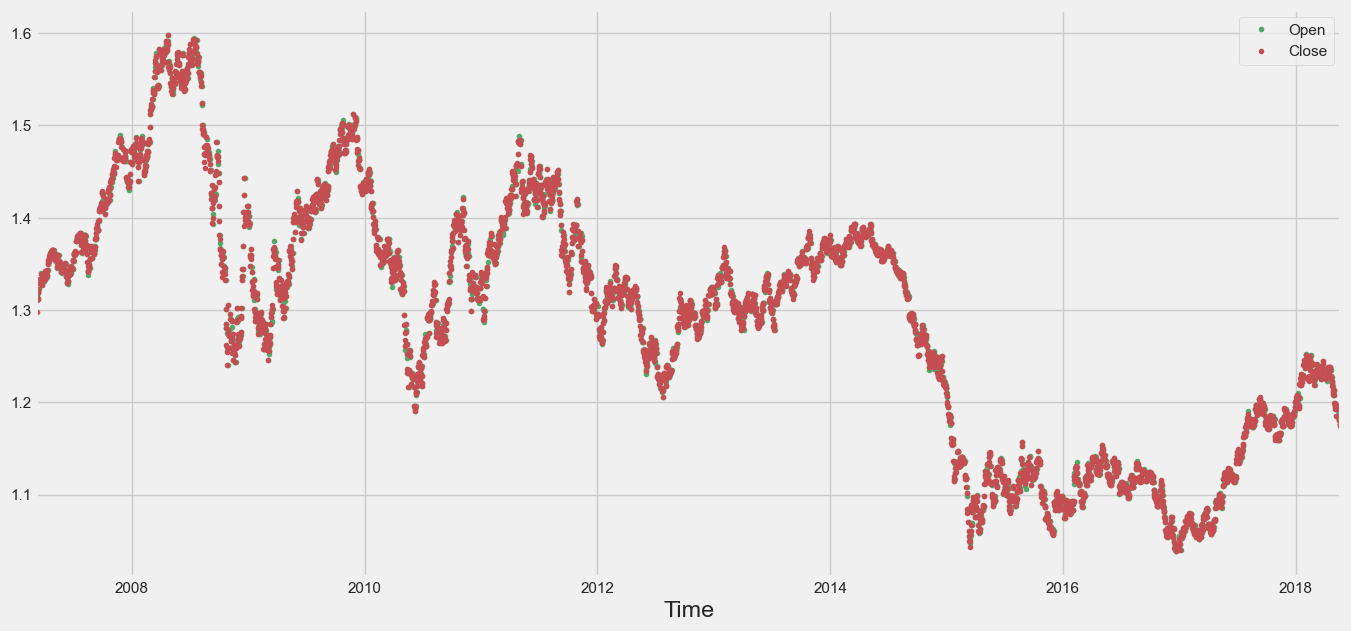

In [249]:
data[['Open', 'Close']].plot(figsize=(15, 7),
                            color=color_pal[2:4],
                            style='.')

# Split data

In [250]:
train = df.loc[df.index < '01-01-2016']
val = df.loc[df.index >= '01-01-2016']

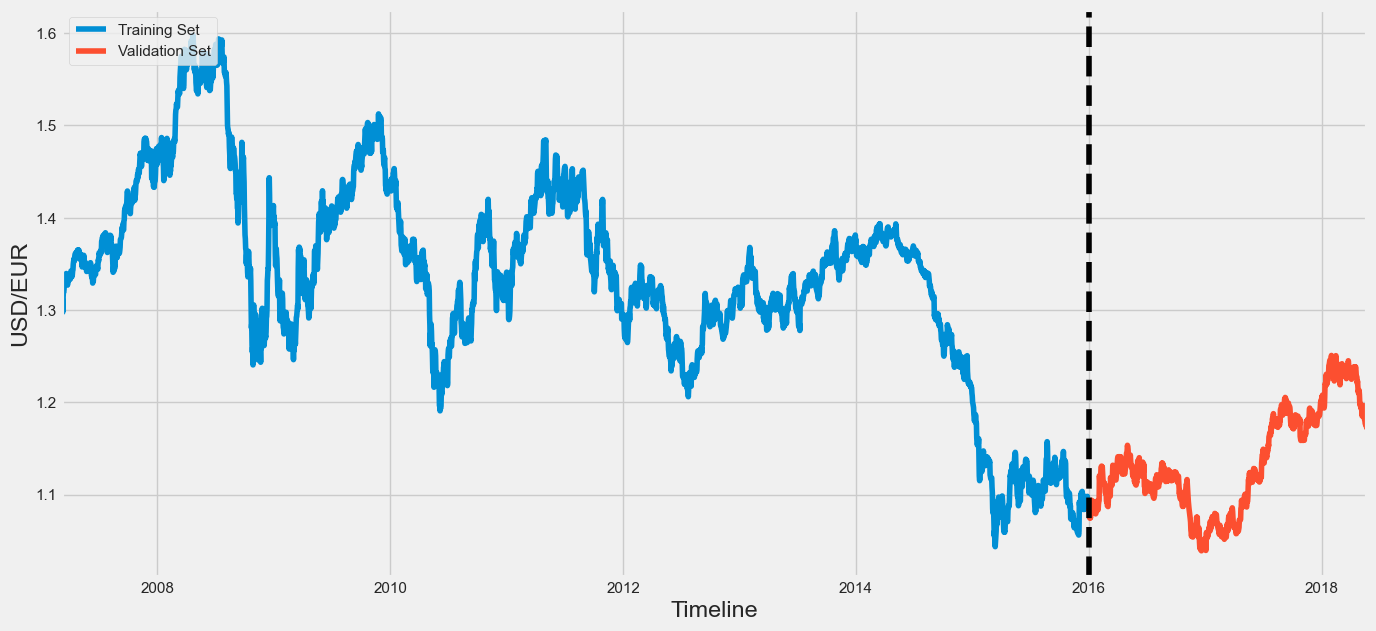

In [251]:
fig, ax = plt.subplots(figsize=(15, 7))
train['Close'].plot(ax=ax, label='Training Set')
val['Close'].plot(ax=ax, label='Validation Set')
ax.axvline('01-01-2016', color='Black', linestyle='--')
ax.legend(loc='upper left')
ax.set_xlabel('Timeline')
ax.set_ylabel('USD/EUR')
plt.show()

# Create features

<Axes: xlabel='Time'>

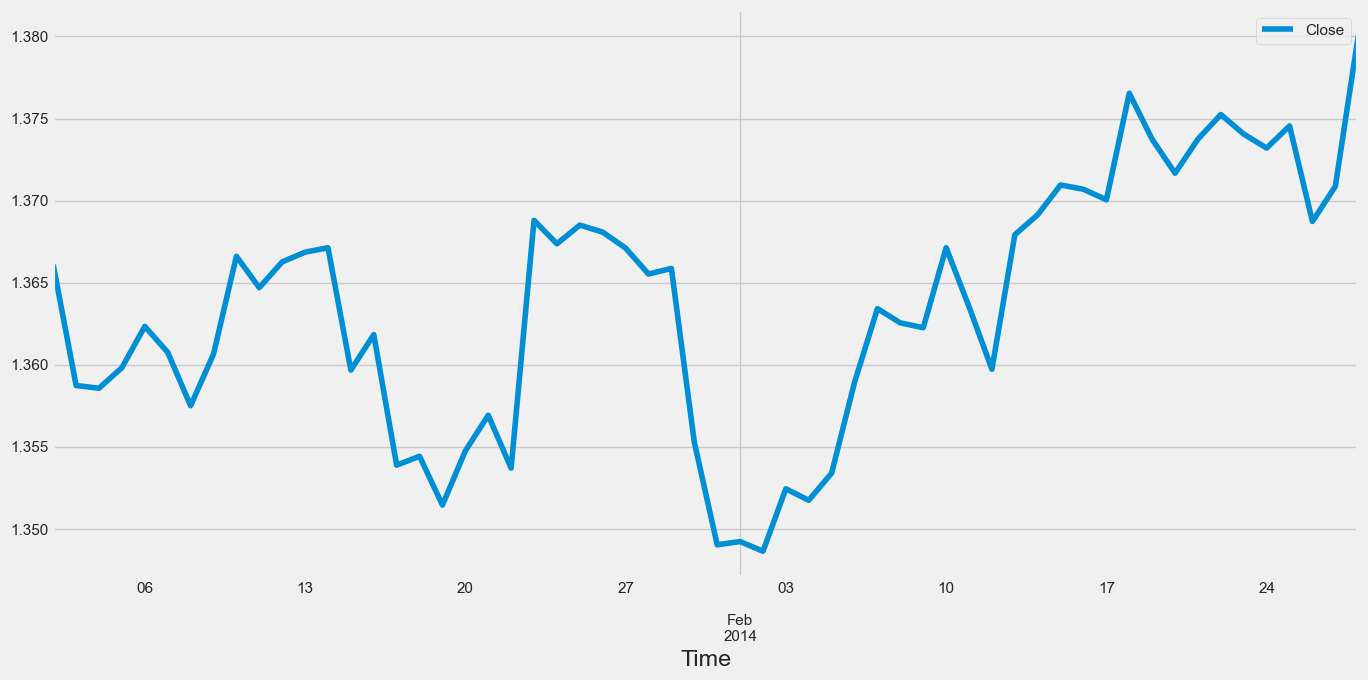

In [252]:
df.loc[(df.index > '01-01-2014') & (df.index < '03-01-2014')].plot(figsize=(15, 7))

In [253]:
df

,Close
Time,
2007-03-07,1.316480
2007-03-08,1.313960
2007-03-09,1.311180
2007-03-10,1.297538
2007-03-11,1.311750
...,...
2018-05-19,1.176343
2018-05-20,1.174740
2018-05-21,1.179130


In [254]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year

    # Create lag features
    df['lag1'] = df['Close'].shift(1)
    df['lag2'] = df['Close'].shift(2)
    df['lag3'] = df['Close'].shift(3)

    # Create rolling window statistics
    #df['rolling_mean'] = df['Close'].rolling(window=3).mean()
    df['rolling_std'] = df['Close'].rolling(window=3).std()
    return df

In [255]:
df = create_features(df)

In [256]:
df

,Close,quarter,month,year,lag1,lag2,lag3,rolling_std
Time,,,,,,,,
2007-03-07,1.316480,1,3,2007,NaN,NaN,NaN,NaN
2007-03-08,1.313960,1,3,2007,1.316480,NaN,NaN,NaN
2007-03-09,1.311180,1,3,2007,1.313960,1.316480,NaN,0.002651
2007-03-10,1.297538,1,3,2007,1.311180,1.313960,1.316480,0.008789
2007-03-11,1.311750,1,3,2007,1.297538,1.311180,1.313960,0.008046
...,...,...,...,...,...,...,...,...
2018-05-19,1.176343,2,5,2018,1.176890,1.180520,1.181140,0.002270
2018-05-20,1.174740,2,5,2018,1.176343,1.176890,1.180520,0.001117
2018-05-21,1.179130,2,5,2018,1.174740,1.176343,1.176890,0.002221


# Feature/Target Relationships

Text(0.5, 1.0, 'Close by Quarter')

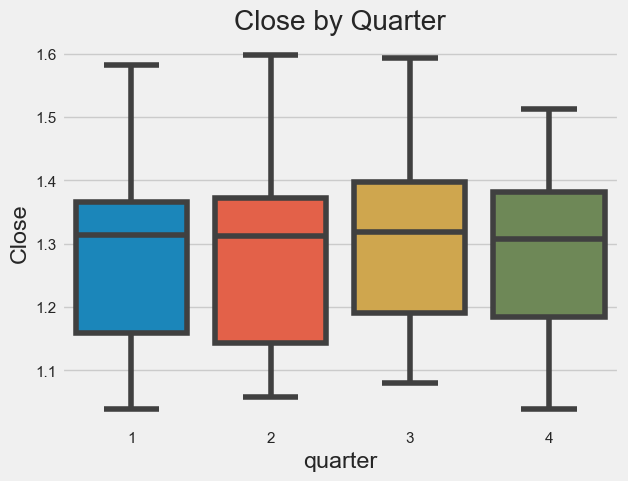

In [257]:
sns.boxplot(data=df, x='quarter', y='Close')
plt.title("Close by Quarter")

Text(0.5, 1.0, 'Close by Month')

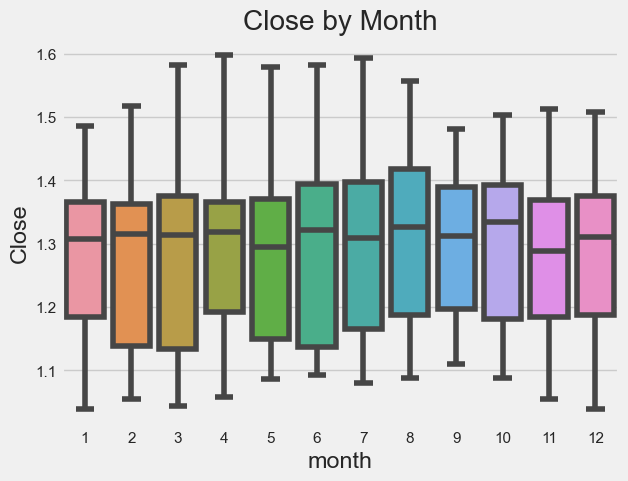

In [258]:
sns.boxplot(data=df, x='month', y='Close')
plt.title("Close by Month")

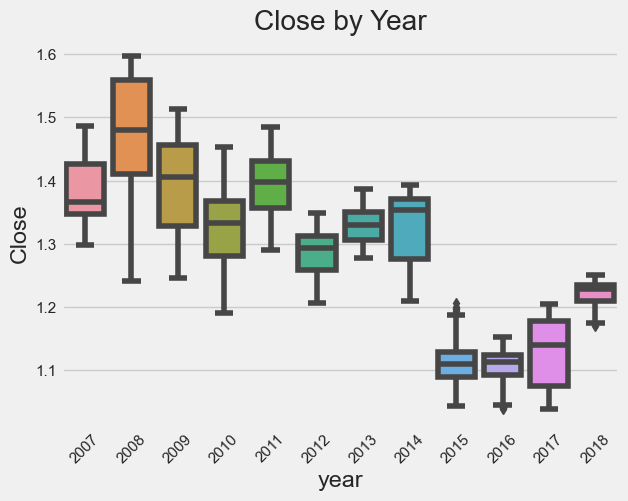

In [259]:
sns.boxplot(data=df, x='year', y='Close')
plt.title("Close by Year")
plt.xticks(rotation=45);

# Create model

In [260]:
train = create_features(train)
val = create_features(val)

FEATURES = ['quarter', 'month', 'year', 'lag1', 'lag2', 'lag3', 'rolling_std']
TARGET = 'Close'

In [261]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_val = val[FEATURES]
y_val = val[TARGET]

In [262]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'alpha': [0.1, 0.3, 0.5],
    'reg_lambda': [0.1, 0.3, 0.5]
}

One way of avoiding overfitting or relying too much on a single variable, is to use regularization techniques. Regularization adds a penalty term to the loss function that the model is trying to minimize, which encourages the model to use simpler solutions and reduces its reliance on any single feature.

There are several types of regularization that you can use with XGBoost, including L1 regularization (also known as Lasso regularization) and L2 regularization (also known as Ridge regularization). L1 regularization adds a penalty term proportional to the absolute value of the feature weights, while L2 regularization adds a penalty term proportional to the square of the feature weights.

In [263]:
# Create the XGBoost model
reg = xgb.XGBRegressor()

In [264]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.5],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'reg_lambda': [0.1, 0.3, 0.5]})

In [265]:
# Print the best hyperparameters
print(grid_search.best_params_)

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'reg_lambda': 0.1}


In [266]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=100)

[0]	validation_0-rmse:0.59015	validation_1-rmse:0.44409
[99]	validation_0-rmse:0.00272	validation_1-rmse:0.01254


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [267]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01, alpha=0.1, reg_lambda=0.5)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=100)

[0]	validation_0-rmse:0.83369	validation_1-rmse:0.63135
[100]	validation_0-rmse:0.30591	validation_1-rmse:0.22934
[200]	validation_0-rmse:0.11254	validation_1-rmse:0.08462
[300]	validation_0-rmse:0.04196	validation_1-rmse:0.03326
[400]	validation_0-rmse:0.01685	validation_1-rmse:0.01617
[500]	validation_0-rmse:0.00899	validation_1-rmse:0.01164
[600]	validation_0-rmse:0.00711	validation_1-rmse:0.01061
[700]	validation_0-rmse:0.00671	validation_1-rmse:0.01038
[800]	validation_0-rmse:0.00653	validation_1-rmse:0.01033
[900]	validation_0-rmse:0.00635	validation_1-rmse:0.01033
[902]	validation_0-rmse:0.00634	validation_1-rmse:0.01033


XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

# Feature importance

In [268]:
fi = pd.DataFrame(reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['Importance']).sort_values(by='Importance', ascending=False)

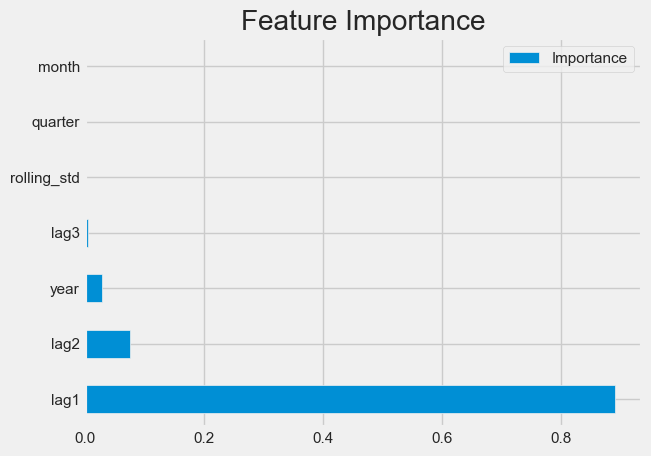

In [269]:
fi.plot(kind='barh', title='Feature Importance');

In [270]:
fi

,Importance
lag1,0.890601
lag2,0.075516
year,0.028367
lag3,0.004993
rolling_std,0.000239
quarter,0.000162
month,0.000123


# Forecast on Test

In [271]:
val['prediction'] = reg.predict(X_val)

In [272]:
df.merge(val,how='left',left_index=True,right_index=True)[['Close_x','Close_y']]

,Close_x,Close_y
Time,,
2007-03-07,1.316480,NaN
2007-03-08,1.313960,NaN
2007-03-09,1.311180,NaN
2007-03-10,1.297538,NaN
2007-03-11,1.311750,NaN
...,...,...
2018-05-19,1.176343,1.176343
2018-05-20,1.174740,1.174740
2018-05-21,1.179130,1.179130


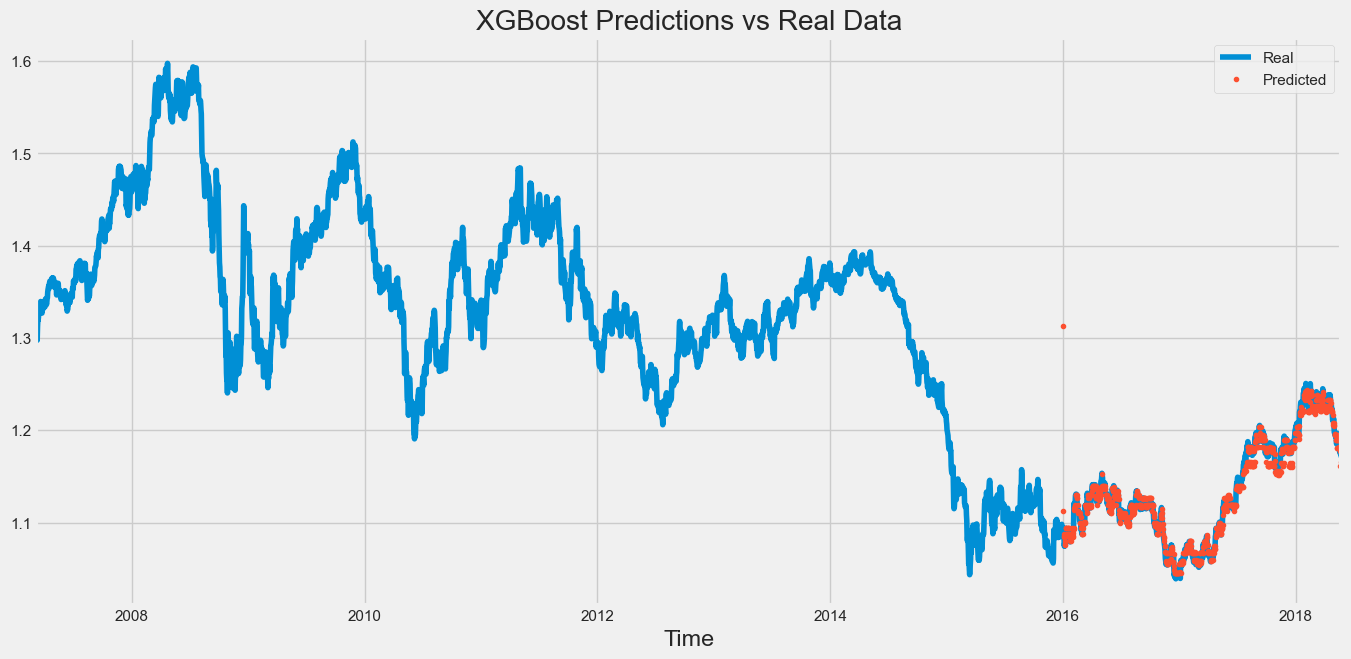

In [273]:
ax = df[['Close']].plot(figsize=(15, 7))
val['prediction'].plot(ax=ax, style='.', figsize=(15, 7))
plt.legend(['Real', 'Predicted'])
ax.set_title("XGBoost Predictions vs Real Data");

---
# Make predictions for actual test data

In [274]:
test = pd.read_csv('./Reto 3/data/testing_set.csv', index_col='Time', parse_dates=True)

In [275]:
test = create_features(test)

X_test = test[FEATURES]
y_test = test[TARGET]

In [276]:
test['prediction'] = reg.predict(X_test)

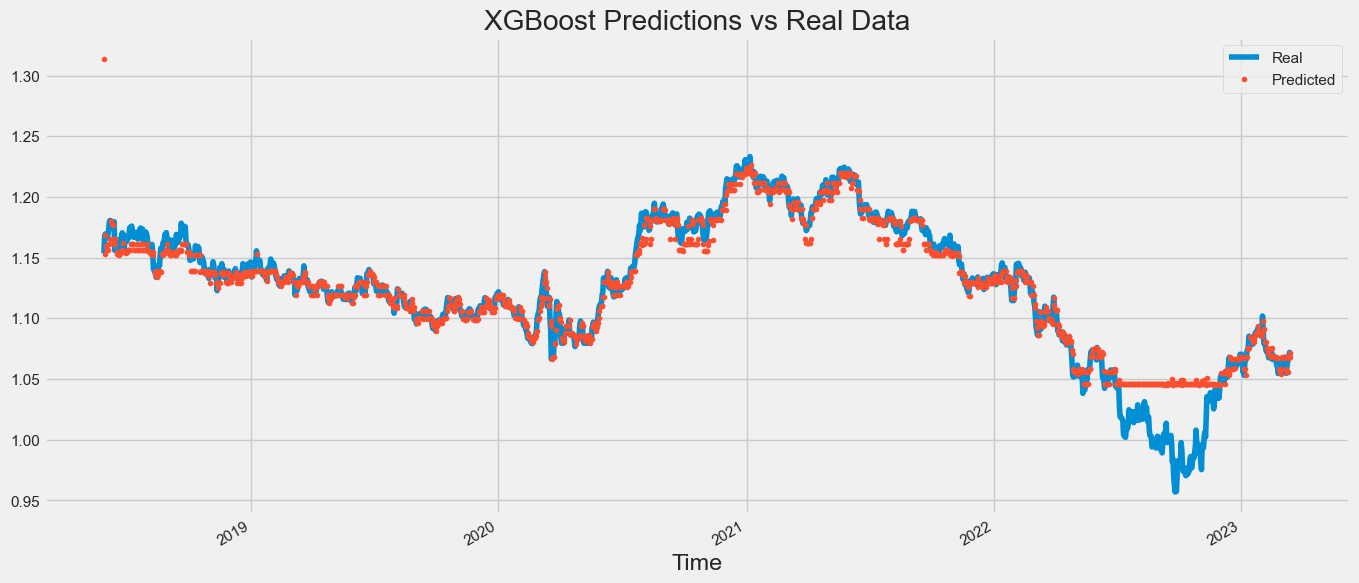

In [277]:
ax = test[['Close']].plot(figsize=(15, 7))
test['prediction'].plot(ax=ax, style='.', figsize=(15, 7))
plt.legend(['Real', 'Predicted'])
ax.set_title("XGBoost Predictions vs Real Data");

---
# Create labels

In [278]:
# Add predicted label to the test set, 0 if the close value is lower than the previous one, 1 otherwise
test['shifted'] = test['Close'].shift(1)
test['predicted_label'] = test.apply(lambda x: 0 if x['prediction'] < x['shifted'] else 1, axis=1)

In [279]:
# Crear un DataFrame con las predicciones
predictions = pd.DataFrame({"Id": test["test_idx"], "target": test.predicted_label})

In [280]:
predictions.target.value_counts()

target
0    953
1    547
Name: count, dtype: int64

In [281]:
# crear un json con la siguiente estructura
# {"target":
#   {
#     "0": 0,
#   },
#   {
#     "1": 0,
#   },
#   {
#     "n": k,
#   }
# }
# donde n es el índice del subconjunto de prueba y k es la predicción del modelo

import json

json_dict = {"target": {}}
for i in range(len(predictions)):
    json_dict["target"][str(i)] = int(predictions["target"][i])

# Convertir el diccionario a JSON
json_str = json.dumps(json_dict)

# Guardar el archivo json
with open("predictions.json", "w") as outfile:
    outfile.write(json_str)